### The libraries comparison in **San Jose** and **Fremont**

In [4]:
import requests 
import pandas as pd
import numpy as np

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim


from IPython.display import Image 
from IPython.core.display import HTML 
    

from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium 

print('Folium installed')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Folium installed


In [5]:
CLIENT_ID = 'GOZJBKWXUU1NZOS2CKYSVUF4S44Y04ZUOINYT4JEPCKS14W4' # your Foursquare ID
CLIENT_SECRET = '01WKCDBIJASO1MKYU3QBAYDISGX1NOG0N31BEIFGGFH0X5GE' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 50
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: GOZJBKWXUU1NZOS2CKYSVUF4S44Y04ZUOINYT4JEPCKS14W4
CLIENT_SECRET:01WKCDBIJASO1MKYU3QBAYDISGX1NOG0N31BEIFGGFH0X5GE


In [6]:
city1 = 'San Jose, CA'

geolocator1 = Nominatim(user_agent="foursquare_agent")
location1 = geolocator1.geocode(city1)
latitude1 = location1.latitude
longitude1 = location1.longitude
print('San Jose',latitude1, longitude1)

San Jose 37.3361905 -121.8905833


In [7]:
city2 = 'Fremont, California'
geolocator2 = Nominatim(user_agent="foursquare_agent")
location2 = geolocator2.geocode(city2)
latitude2 = location2.latitude
longitude2 = location2.longitude
print('Fremont',latitude2,longitude2)

Fremont 37.5482697 -121.9885719


### Library data request

In [8]:
search_query1 = 'library'
LIMIT = 50
radius = 5000

url1 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
    CLIENT_ID,
    CLIENT_SECRET,
    latitude1,
    longitude1,
    VERSION,
    search_query1,
    radius,
    LIMIT)

url1

'https://api.foursquare.com/v2/venues/search?client_id=GOZJBKWXUU1NZOS2CKYSVUF4S44Y04ZUOINYT4JEPCKS14W4&client_secret=01WKCDBIJASO1MKYU3QBAYDISGX1NOG0N31BEIFGGFH0X5GE&ll=37.3361905,-121.8905833&v=20180604&query=library&radius=5000&limit=50'

In [9]:
search_query2 = 'library'
LIMIT = 50
radius = 5000

url2 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
    CLIENT_ID,
    CLIENT_SECRET,
    latitude2,
    longitude2,
    VERSION,
    search_query2,
    radius,
    LIMIT)

url2

'https://api.foursquare.com/v2/venues/search?client_id=GOZJBKWXUU1NZOS2CKYSVUF4S44Y04ZUOINYT4JEPCKS14W4&client_secret=01WKCDBIJASO1MKYU3QBAYDISGX1NOG0N31BEIFGGFH0X5GE&ll=37.5482697,-121.9885719&v=20180604&query=library&radius=5000&limit=50'

In [10]:
results1 = requests.get(url1).json()
results1

{'meta': {'code': 200, 'requestId': '5e09985f1d67cb001b5c655a'},
 'response': {'venues': [{'id': '4a6a3154f964a520cbcc1fe3',
    'name': 'Dr. Martin Luther King, Jr. Library',
    'location': {'address': '150 E San Fernando St',
     'crossStreet': 'at S. 4th St.',
     'lat': 37.3354674978388,
     'lng': -121.885000292107,
     'labeledLatLngs': [{'label': 'display',
       'lat': 37.3354674978388,
       'lng': -121.885000292107}],
     'distance': 500,
     'postalCode': '95112',
     'cc': 'US',
     'city': 'San Jose',
     'state': 'CA',
     'country': 'United States',
     'formattedAddress': ['150 E San Fernando St (at S. 4th St.)',
      'San Jose, CA 95112',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d1a7941735',
      'name': 'College Library',
      'pluralName': 'College Libraries',
      'shortName': 'Library',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/library_',
       'suffix': '.png'},
      'primary': True}],
  

In [11]:
results2 = requests.get(url2).json()
results2

{'meta': {'code': 200, 'requestId': '5e09988c9388d7001c962021'},
 'response': {'venues': [{'id': '4af5f69ef964a52083ff21e3',
    'name': 'Fremont Main Library',
    'location': {'address': '2400 Stevenson Blvd',
     'lat': 37.55089490542579,
     'lng': -121.97113868726072,
     'labeledLatLngs': [{'label': 'display',
       'lat': 37.55089490542579,
       'lng': -121.97113868726072}],
     'distance': 1566,
     'postalCode': '94538',
     'cc': 'US',
     'city': 'Fremont',
     'state': 'CA',
     'country': 'United States',
     'formattedAddress': ['2400 Stevenson Blvd',
      'Fremont, CA 94538',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d12f941735',
      'name': 'Library',
      'pluralName': 'Libraries',
      'shortName': 'Library',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/library_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1577687222',
    'hasPerk': False},
   {'id': '4fed6ec6e4b0283e9

In [12]:

sanJose = results1['response']['venues']


df1 = json_normalize(sanJose)
df1.head()

,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,venuePage.id
0,4a6a3154f964a520cbcc1fe3,"Dr. Martin Luther King, Jr. Library","[{'id': '4bf58dd8d48988d1a7941735', 'name': 'C...",v-1577687221,False,150 E San Fernando St,at S. 4th St.,37.335467,-121.885000,"[{'label': 'display', 'lat': 37.3354674978388,...",500,95112,US,San Jose,CA,United States,"[150 E San Fernando St (at S. 4th St.), San Jo...",NaN
1,4b5f98a2f964a520a8c329e3,Joyce Ellington Branch Library,"[{'id': '4bf58dd8d48988d12f941735', 'name': 'L...",v-1577687221,False,491 E Empire St,NaN,37.349781,-121.887064,"[{'label': 'display', 'lat': 37.34978070190505...",1544,95112,US,San Jose,CA,United States,"[491 E Empire St, San Jose, CA 95112, United S...",NaN
2,59cd8e9b6eda021ecf132466,MLKJ Library TeenHQ,"[{'id': '4bf58dd8d48988d12f941735', 'name': 'L...",v-1577687221,False,Dr Martin Luther King Jr Library,San Fernando St,37.335808,-121.885095,"[{'label': 'display', 'lat': 37.335808, 'lng':...",487,95112,US,San Jose,CA,United States,[Dr Martin Luther King Jr Library (San Fernand...,NaN
3,4a43dd51f964a520e5a61fe3,Rose Garden Branch Library,"[{'id': '4bf58dd8d48988d12f941735', 'name': 'L...",v-1577687221,False,1580 Naglee Ave,at Dana Ave,37.331965,-121.926273,"[{'label': 'display', 'lat': 37.33196529711205...",3193,95126,US,San Jose,CA,United States,"[1580 Naglee Ave (at Dana Ave), San Jose, CA 9...",NaN
4,4b462444f964a520da1726e3,Santa Clara County Law Library,"[{'id': '4bf58dd8d48988d1a7941735', 'name': 'C...",v-1577687221,False,360 N 1st St,NaN,37.341532,-121.894113,"[{'label': 'display', 'lat': 37.341532, 'lng':...",671,95113,US,San Jose,CA,United States,"[360 N 1st St, San Jose, CA 95113, United States]",NaN


In [13]:
df1.rename(columns={'location.city':'city'},inplace=True)

In [14]:
df1 = df1[df1['city'] == 'San Jose'].reset_index(drop=True)
df1.head()

,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,city,location.state,location.country,location.formattedAddress,venuePage.id
0,4a6a3154f964a520cbcc1fe3,"Dr. Martin Luther King, Jr. Library","[{'id': '4bf58dd8d48988d1a7941735', 'name': 'C...",v-1577687221,False,150 E San Fernando St,at S. 4th St.,37.335467,-121.885000,"[{'label': 'display', 'lat': 37.3354674978388,...",500,95112,US,San Jose,CA,United States,"[150 E San Fernando St (at S. 4th St.), San Jo...",NaN
1,4b5f98a2f964a520a8c329e3,Joyce Ellington Branch Library,"[{'id': '4bf58dd8d48988d12f941735', 'name': 'L...",v-1577687221,False,491 E Empire St,NaN,37.349781,-121.887064,"[{'label': 'display', 'lat': 37.34978070190505...",1544,95112,US,San Jose,CA,United States,"[491 E Empire St, San Jose, CA 95112, United S...",NaN
2,59cd8e9b6eda021ecf132466,MLKJ Library TeenHQ,"[{'id': '4bf58dd8d48988d12f941735', 'name': 'L...",v-1577687221,False,Dr Martin Luther King Jr Library,San Fernando St,37.335808,-121.885095,"[{'label': 'display', 'lat': 37.335808, 'lng':...",487,95112,US,San Jose,CA,United States,[Dr Martin Luther King Jr Library (San Fernand...,NaN
3,4a43dd51f964a520e5a61fe3,Rose Garden Branch Library,"[{'id': '4bf58dd8d48988d12f941735', 'name': 'L...",v-1577687221,False,1580 Naglee Ave,at Dana Ave,37.331965,-121.926273,"[{'label': 'display', 'lat': 37.33196529711205...",3193,95126,US,San Jose,CA,United States,"[1580 Naglee Ave (at Dana Ave), San Jose, CA 9...",NaN
4,4b462444f964a520da1726e3,Santa Clara County Law Library,"[{'id': '4bf58dd8d48988d1a7941735', 'name': 'C...",v-1577687221,False,360 N 1st St,NaN,37.341532,-121.894113,"[{'label': 'display', 'lat': 37.341532, 'lng':...",671,95113,US,San Jose,CA,United States,"[360 N 1st St, San Jose, CA 95113, United States]",NaN


In [15]:
df1.shape

(35, 18)

In [16]:
df1.dropna(subset=['location.postalCode'],axis=0,inplace = True)

### Number of libraries in zip area

In [17]:
SJLzip = df1['location.postalCode'].value_counts().to_frame()
SJLzip.columns=['Count']


In [18]:
SJLzip.head()

,Count
95112,13
95126,5
95113,3
95133,2
95128,2


In [19]:
import matplotlib.pyplot as plt
SJLzip.plot(kind='bar',figsize=(10,6), color='darkgreen')

plt.xlabel('zipcode')
plt.ylabel('Number of libraries')
plt.title('Number of libraries in zip code area')

plt.show()

<Figure size 1000x600 with 1 Axes>

In [20]:
import matplotlib.patches as patches

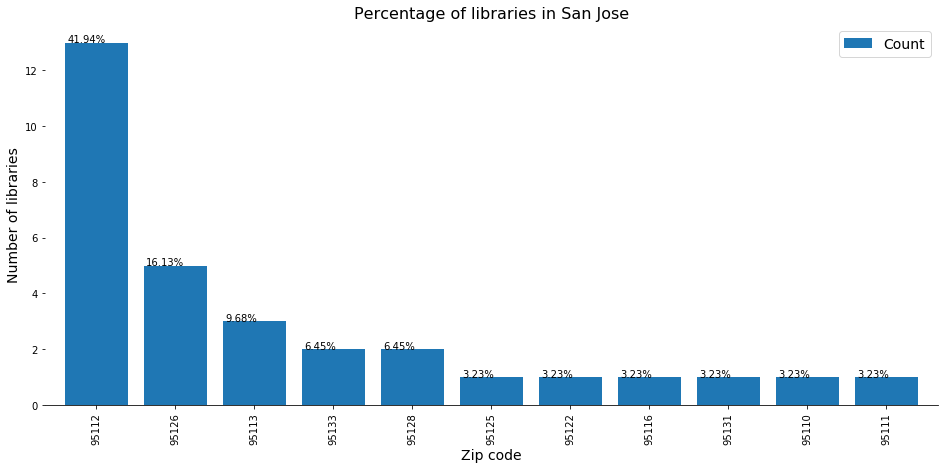

In [21]:
ax=SJLzip.plot(kind='bar', figsize=(16,7), width=0.8)

ax.legend(prop={'size':14})
ax.set_ylabel('Number of libraries',size = 14)
ax.set_xlabel('Zip code',size=14)
ax.set_title('Percentage of libraries in San Jose', size=16)

totals = []
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.03, i.get_height()+0.01, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=10,
                color='black')
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

In [22]:
fremont = results2['response']['venues']


df2 = json_normalize(fremont)
df2.head()

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet
0,4af5f69ef964a52083ff21e3,Fremont Main Library,"[{'id': '4bf58dd8d48988d12f941735', 'name': 'L...",v-1577687222,False,2400 Stevenson Blvd,37.550895,-121.971139,"[{'label': 'display', 'lat': 37.55089490542579...",1566,94538,US,Fremont,CA,United States,"[2400 Stevenson Blvd, Fremont, CA 94538, Unite...",NaN
1,4fed6ec6e4b0283e9a18f854,Fremont Main Library,"[{'id': '4bf58dd8d48988d12f941735', 'name': 'L...",v-1577687222,False,NaN,37.550525,-121.984792,"[{'label': 'display', 'lat': 37.55052529217357...",417,94538,US,Fremont,CA,United States,"[Fremont, CA 94538, United States]",NaN
2,4c006e6fad15a59363f18d73,Fremont Library,"[{'id': '4bf58dd8d48988d12f941735', 'name': 'L...",v-1577687222,False,NaN,37.549833,-121.983565,"[{'label': 'display', 'lat': 37.54983258663893...",474,94538,US,Fremont,CA,United States,"[Fremont, CA 94538, United States]",at Stevenson Blvd
3,4b5f8f7df964a520b4c129e3,Irvington Library,"[{'id': '4bf58dd8d48988d12f941735', 'name': 'L...",v-1577687222,False,41825 Greenpark Dr,37.522423,-121.964885,"[{'label': 'display', 'lat': 37.52242299999999...",3556,94538,US,Fremont,CA,United States,"[41825 Greenpark Dr, Fremont, CA 94538, United...",NaN
4,5944163d4382ab30b28e7640,Jfk Library,"[{'id': '4bf58dd8d48988d12f941735', 'name': 'L...",v-1577687222,False,NaN,37.529193,-121.986432,"[{'label': 'display', 'lat': 37.52919290360988...",2131,94538,US,Fremont,CA,United States,"[Fremont, CA 94538, United States]",NaN


In [23]:
df2.dropna(subset=['location.postalCode'],axis=0,inplace = True)

In [24]:
df2 = df2[df2['location.city'] == 'Fremont'].reset_index(drop=True)
df2.shape

(7, 17)

In [25]:
df1.isnull()

,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,city,location.state,location.country,location.formattedAddress,venuePage.id
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
5,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
6,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
7,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
9,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True
10,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True


In [26]:
df2.isnull()

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [27]:
df1['city'].value_counts()

San Jose    31
Name: city, dtype: int64

In [28]:
df2['location.city'].value_counts()

Fremont    7
Name: location.city, dtype: int64

### daycare data request

In [29]:
search_query3 = 'daycare'
LIMIT = 50
radius = 5000

url3 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
    CLIENT_ID,
    CLIENT_SECRET,
    latitude1,
    longitude1,
    VERSION,
    search_query3,
    radius,
    LIMIT)

url3

'https://api.foursquare.com/v2/venues/search?client_id=GOZJBKWXUU1NZOS2CKYSVUF4S44Y04ZUOINYT4JEPCKS14W4&client_secret=01WKCDBIJASO1MKYU3QBAYDISGX1NOG0N31BEIFGGFH0X5GE&ll=37.3361905,-121.8905833&v=20180604&query=daycare&radius=5000&limit=50'

In [30]:
results3 = requests.get(url3).json()
results3

{'meta': {'code': 200, 'requestId': '5e09989ead1ab4001be63606'},
 'response': {'venues': [{'id': '4c7ed40afb13a1cd93e29ea4',
    'name': 'Daycare',
    'location': {'lat': 37.369899,
     'lng': -121.850804,
     'labeledLatLngs': [{'label': 'display',
       'lat': 37.369899,
       'lng': -121.850804}],
     'distance': 5144,
     'postalCode': '95133',
     'cc': 'US',
     'city': 'San Jose',
     'state': 'CA',
     'country': 'United States',
     'formattedAddress': ['San Jose, CA 95133', 'United States']},
    'categories': [{'id': '4f4532974b9074f6e4fb0104',
      'name': 'Daycare',
      'pluralName': 'Daycares',
      'shortName': 'Daycare',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/daycare_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1577687223',
    'hasPerk': False},
   {'id': '4fa4600fe4b0ac15cef2bbf2',
    'name': 'Willow Glen Daycare',
    'location': {'address': '1016 Meridian Ave',
     'lat': 37.309364318847

In [31]:

sanJose_daycare = results3['response']['venues']


df3 = json_normalize(sanJose_daycare)
df3.head()

,id,name,categories,referralId,hasPerk,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.address,location.isFuzzed,location.isServiceAreaBusiness
0,4c7ed40afb13a1cd93e29ea4,Daycare,"[{'id': '4f4532974b9074f6e4fb0104', 'name': 'D...",v-1577687223,False,37.369899,-121.850804,"[{'label': 'display', 'lat': 37.369899, 'lng':...",5144,95133,US,San Jose,CA,United States,"[San Jose, CA 95133, United States]",NaN,NaN,NaN
1,4fa4600fe4b0ac15cef2bbf2,Willow Glen Daycare,"[{'id': '4f4532974b9074f6e4fb0104', 'name': 'D...",v-1577687223,False,37.309364,-121.913414,"[{'label': 'display', 'lat': 37.30936431884765...",3605,95125,US,San Jose,CA,United States,"[1016 Meridian Ave, San Jose, CA 95125, United...",1016 Meridian Ave,NaN,NaN
2,4f9ab968e4b0ad38548ed20d,Niki's Daycare,"[{'id': '4f4532974b9074f6e4fb0104', 'name': 'D...",v-1577687223,False,37.300900,-121.896708,"[{'label': 'display', 'lat': 37.30090013937539...",3965,95125,US,San Jose,CA,United States,"[San Jose, CA 95125, United States]",NaN,NaN,NaN
3,551057c5498e5529e6cb848d,ywca day care,"[{'id': '4f4533814b9074f6e4fb0107', 'name': 'N...",v-1577687223,False,37.330736,-121.884786,"[{'label': 'display', 'lat': 37.33073589118909...",794,NaN,US,San Jose,CA,United States,"[San Jose, CA, United States]",NaN,NaN,NaN
4,5595a7bf498ed14c4a6a363f,Diane's Daycare,"[{'id': '4f4532974b9074f6e4fb0104', 'name': 'D...",v-1577687223,False,37.331000,-121.945370,"[{'label': 'display', 'lat': 37.331, 'lng': -1...",4883,95128,US,San Jose,CA,United States,"[San Jose, CA 95128, United States]",NaN,True,True


In [32]:
df3.shape

(10, 18)

In [33]:
search_query4 = 'daycare'
LIMIT = 50
radius = 5000

url4 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
    CLIENT_ID,
    CLIENT_SECRET,
    latitude2,
    longitude2,
    VERSION,
    search_query4,
    radius,
    LIMIT)

url4

'https://api.foursquare.com/v2/venues/search?client_id=GOZJBKWXUU1NZOS2CKYSVUF4S44Y04ZUOINYT4JEPCKS14W4&client_secret=01WKCDBIJASO1MKYU3QBAYDISGX1NOG0N31BEIFGGFH0X5GE&ll=37.5482697,-121.9885719&v=20180604&query=daycare&radius=5000&limit=50'

In [34]:
results4 = requests.get(url4).json()
results4

{'meta': {'code': 200, 'requestId': '5e0998b9949393001b123f7f'},
 'response': {'venues': [{'id': '4e0a1be97d8b2a01806cfaea',
    'name': 'Lulus Daycare',
    'location': {'lat': 37.538464,
     'lng': -121.991295,
     'labeledLatLngs': [{'label': 'display',
       'lat': 37.538464,
       'lng': -121.991295}],
     'distance': 1117,
     'cc': 'US',
     'city': 'Fremont',
     'state': 'CA',
     'country': 'United States',
     'formattedAddress': ['Fremont, CA', 'United States']},
    'categories': [{'id': '4f4532974b9074f6e4fb0104',
      'name': 'Daycare',
      'pluralName': 'Daycares',
      'shortName': 'Daycare',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/daycare_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1577687223',
    'hasPerk': False},
   {'id': '5049609fe4b0fbe28f19ed07',
    'name': 'Little Angels Daycare',
    'location': {'lat': 37.56050268415861,
     'lng': -121.99044511767096,
     'labeledLatLngs': [{'la

In [35]:
fremont_daycare = results4['response']['venues']


df4 = json_normalize(fremont_daycare)
df4.head()

,id,name,categories,referralId,hasPerk,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.city,location.state,location.country,location.formattedAddress,location.postalCode,location.address,location.crossStreet
0,4e0a1be97d8b2a01806cfaea,Lulus Daycare,"[{'id': '4f4532974b9074f6e4fb0104', 'name': 'D...",v-1577687223,False,37.538464,-121.991295,"[{'label': 'display', 'lat': 37.538464, 'lng':...",1117,US,Fremont,CA,United States,"[Fremont, CA, United States]",NaN,NaN,NaN
1,5049609fe4b0fbe28f19ed07,Little Angels Daycare,"[{'id': '4f4532974b9074f6e4fb0104', 'name': 'D...",v-1577687223,False,37.560503,-121.990445,"[{'label': 'display', 'lat': 37.56050268415861...",1371,US,Fremont,CA,United States,"[Fremont, CA 94536, United States]",94536,NaN,NaN
2,520df2d68bbd3cd4283313e3,Ereno Daycare and Preschool,"[{'id': '4f4532974b9074f6e4fb0104', 'name': 'D...",v-1577687223,False,37.560686,-121.990386,"[{'label': 'display', 'lat': 37.560686, 'lng':...",1391,US,Fremont,CA,United States,"[2555 Ann St, Fremont, CA 94536, United States]",94536,2555 Ann St,NaN
3,4bf3f3906a31d13a3026952e,Little Bunnies Daycare,"[{'id': '4f4532974b9074f6e4fb0104', 'name': 'D...",v-1577687223,False,37.534162,-121.986557,"[{'label': 'display', 'lat': 37.534162, 'lng':...",1580,US,Fremont,CA,United States,"[Eric St (at Nelson), Fremont, CA, United States]",NaN,Eric St,at Nelson
4,50089bd2e4b0d0fe1365b25a,Little People Daycare,"[{'id': '4f4532974b9074f6e4fb0104', 'name': 'D...",v-1577687223,False,37.533865,-121.979550,"[{'label': 'display', 'lat': 37.53386500000000...",1790,US,Fremont,CA,United States,"[4566 Todd St, Fremont, CA 94538, United States]",94538,4566 Todd St,NaN


In [36]:
df4.shape

(11, 17)

### Maps of Libarary data

In [37]:
SanJose_map = folium.Map(location=[latitude1, longitude1], zoom_start=13) 

for lat, lng,in zip(df1['location.lat'], df1['location.lng']):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(SanJose_map)
for lat, lng,in zip(df3['location.lat'], df3['location.lng']):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='red',
        fill = True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(SanJose_map)

from branca.element import Template, MacroElement

template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>
     
<div class='legend-title'>Legend (draggable)</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:red;opacity:0.7;'></span>Daycare</li>
    <li><span style='background:blue;opacity:0.7;'></span>Library</li>
   

  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)

SanJose_map.get_root().add_child(macro)
    
SanJose_map

In [38]:

Fremont_map = folium.Map(location=[latitude2, longitude2], zoom_start=13) 


for lat, lng in zip(df2['location.lat'], df2['location.lng']):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(Fremont_map)

for lat, lng in zip(df4['location.lat'], df4['location.lng']):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='red',
        fill = True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(Fremont_map)

from branca.element import Template, MacroElement

template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>
     
<div class='legend-title'>Legend (draggable)</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:red;opacity:0.7;'></span>Daycare</li>
    <li><span style='background:blue;opacity:0.7;'></span>Library</li>
   

  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)

Fremont_map.get_root().add_child(macro)


    
Fremont_map